In [5]:
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np
import pickle

from plain_net.PlainNet import PlainNet

In [6]:
with open('data/duffing/duffing_dataset.pickle', 'rb') as f:
    train_data = pickle.load(f)

with open('data/duffing/duffing_dataset_test.pickle', 'rb') as f:
    test_data = pickle.load(f)

In [7]:
t_train = torch.linspace(0, train_data.DT * len(train_data.x), len(train_data.y))
t_test = torch.linspace(0, test_data.DT * len(test_data.x), len(test_data.y))

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
test_loader = DataLoader(test_data, shuffle=True)

In [8]:
model = PlainNet([3, 64, 64, 64, 2])

In [9]:
model.train_n_epochs(train_loader=train_loader, n_epochs=1000, lr=0.001, verbose=True)

Epoch 0: loss 0.20345191657543182
Epoch 100: loss 0.00016140012303367257
Epoch 200: loss 0.00011433562758611515
Epoch 300: loss 0.00021054143144283444
Epoch 400: loss 7.013554568402469e-05
Epoch 500: loss 9.382382995681837e-05
Epoch 600: loss 0.00011740281479433179
Epoch 700: loss 7.447032112395391e-05
Epoch 800: loss 9.968021913664415e-05
Epoch 900: loss 4.879158586845733e-05


In [10]:
y_pred = model(test_data.x).detach().numpy()

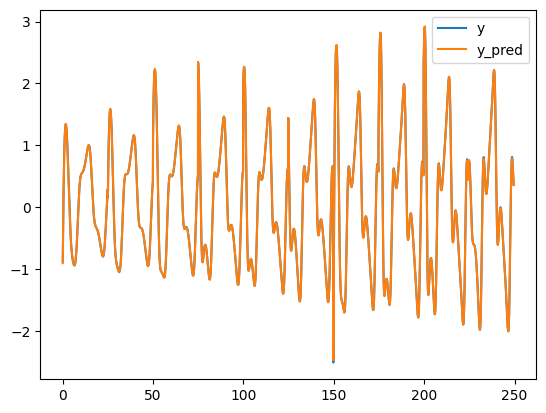

In [11]:
# plot y and y_pred
plt.plot(t_test, test_data.y[:, 0], label="y")
plt.plot(t_test, y_pred[:, 0], label="y_pred")
plt.legend()
plt.show()

In [12]:
for layer in model.layers:
    print(layer.weight.data)

tensor([[-0.2820, -0.1691,  0.1265],
        [ 0.5164, -0.3781, -0.1931],
        [ 0.1077, -0.1515, -0.0081],
        [ 0.3515,  0.4171, -0.2837],
        [-0.0530, -0.2496, -0.4339],
        [-0.1668, -0.0211,  0.1481],
        [-0.1431,  0.0725,  0.2576],
        [-0.4152, -0.0661, -0.2704],
        [ 0.0969, -0.3786, -0.1136],
        [ 0.1905, -0.3245,  0.3136],
        [ 0.6533,  0.0277, -0.0964],
        [-0.0210,  0.2781,  0.4662],
        [ 0.2808,  0.0375, -0.2140],
        [ 0.3613,  0.4706, -0.6212],
        [ 0.6429,  0.2465, -0.3667],
        [ 0.3702, -0.1361, -0.4959],
        [-0.1019, -0.4071,  0.2069],
        [ 0.4862,  0.3021, -0.1570],
        [-0.1996,  0.1126,  0.1393],
        [-0.2270,  0.2325,  0.2151],
        [-0.3483,  0.3568, -0.3624],
        [ 0.1117, -0.1391, -0.4509],
        [-0.1230,  0.1571, -0.1911],
        [ 0.5042,  0.2864, -0.2921],
        [ 0.1828,  0.1675,  0.2062],
        [ 0.3026, -0.2358, -0.3914],
        [ 0.0185, -0.2883,  0.2302],
 